In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# To use only Google Colab
! pip install matplotlib --upgrade

# Unidad I. Variables, distribuciones y pruebas de hipótesis. 


- Estadística inferencial
  - test de hipótesis
  - Tipos de errores
  - Valor P
  - Test T de Student para una muestra.
  - Intervalo de confianza
  - Nivel de confianza
  - Bootstrap
- Prueba de bondad de ajuste a una distribución.
  - chi cuadrado
  - Kolmogorov-Smirnov
- Comparación de dos poblaciones
  - Tests de forma:
    - chi cuadrado
    - Kolmogorov-Smirnov
  - Tests de igualdad de varianza
    - Test F
    - Test de Bartlett
    - Test de Levenne
  - Test de igualdad de medias:
    - T test para dos muestras.
    - Test de Student para variables apareadas.
  - Alternativas no paramétricas.
    - test de Mann Whitney
    - test de Wicolxon.
    - test de la Mediana.
  - Test para variables cualitativas
    - test de fisher.
    - test de McNemar.


## Estadística inferencial

La **estadística inferencial** permite **extraer conclusiones o generalizaciones** sobre una **población** a partir del análisis de una **muestra**.

Su objetivo principal es estimar parámetros desconocidos y evaluar hipótesis sobre la población basándose en evidencia muestral.

### Objetivo

* **Inferir** características de una población (media, proporción, varianza, etc.) sin observarla completamente.
* **Cuantificar la incertidumbre** asociada a esas inferencias.
* **Tomar decisiones** o validar hipótesis mediante métodos probabilísticos.

### Tipos de inferencia

| Tipo de inferencia            | Descripción                                                                                           | Ejemplo                                                    |
| ----------------------------- | ----------------------------------------------------------------------------------------------------- | ---------------------------------------------------------- |
| **Estimación puntual**        | Asigna un único valor muestral como mejor estimador del parámetro poblacional.                        | La media muestral como estimador de la media poblacional.  |
| **Estimación por intervalos** | Proporciona un **rango de valores plausibles** para el parámetro, con un nivel de confianza asociado. | Intervalo de confianza del 95 % para la media.             |



### Pruebas de hipótesis

La **prueba de hipótesis** es un procedimiento estadístico que permite **evaluar una suposición sobre una población** a partir de los datos obtenidos en una muestra.

El objetivo no es “probar que algo es cierto”, sino **evaluar si la evidencia observada contradice suficientemente una afirmación inicial**.

### Etapas del proceso

1. **Formulación de las hipótesis**

   * **Hipótesis nula** $ H_0 $:
     Representa la situación de “no efecto” o “no diferencia”.

     > Ejemplo: “No hay diferencia en el nivel de expresión génica entre tratamientos.”
   * **Hipótesis alternativa** $ H_1 $:
     Representa el efecto o diferencia que queremos detectar.

     > Ejemplo: “El tratamiento A produce una expresión génica distinta al control.”

2. **Obtención de una muestra y cálculo del estadístico de prueba**

   * Se calcula una medida (estadístico) a partir de los datos muestrales.
   * Se compara con lo que se esperaría bajo $ H_0 $.

3. **Evaluación de la evidencia (valor p)**

   * El **valor p** es la probabilidad de obtener un resultado igual o más extremo que el observado, **si $ H_0 $ fuera verdadera**.
   * Si $ p < \alpha $ (nivel de significancia, típicamente 0.05):
     → **Se rechaza ( H_0 )** en favor de $ H_1 $.
   * Si $ p \geq \alpha $:
     → **No se rechaza ( H_0 )** (la evidencia no es suficiente).

4. **Interpretación y conclusiones**

   * Rechazar $ H_0 $ **no implica probar $ H_1 $**; solo indica que los datos son **inconsistentes con $ H_0 $**.
   * No rechazar $ H_0 $ **no significa** que sea verdadera, sino que **no hay evidencia suficiente** para descartarla.


### Tipos de errores en pruebas de hipótesis

En una prueba de hipótesis siempre existe la posibilidad de **tomar una decisión incorrecta**, debido a la variabilidad muestral.
Estos errores se clasifican en **dos tipos fundamentales**:

#### Tabla de decisiones posibles

| **Decisión tomada**     | **$ H_0 $ es verdadera**            | **$ H_1 $ es verdadera**             |
| ----------------------- | ----------------------------------- | ------------------------------------ |
| **Rechazar $ H_0 $**    | **Error Tipo I** *(Falso Positivo)* | Decisión correcta                    |
| **No rechazar $ H_0 $** | Decisión correcta                   | **Error Tipo II** *(Falso Negativo)* |


### Error de tipo I $α$ — Falso positivo

* Ocurre cuando se **rechaza $ H_0 $** siendo en realidad cierta.
* Su probabilidad se denota por **α**, y representa el **nivel de significación estadística** del test.
* Es el umbral de tolerancia que definimos para aceptar el riesgo de equivocarnos al detectar un efecto inexistente.

$ P(\text{rechazar } H_0 ,|, H_0 \text{ es cierta}) = \alpha $

Ejemplo: concluir que un tratamiento tiene efecto cuando en realidad no lo tiene.

### Error de tipo II $β$ — Falso negativo

* Ocurre cuando se **no se rechaza $ H_0 $** siendo falsa.
* Su probabilidad se denota por **β**, y mide la posibilidad de **no detectar un efecto real**.

$ P(\text{no rechazar } H_0 ,|, H_1 \text{ es cierta}) = \beta $

El **poder estadístico** del test es $ 1 - \beta $:

Es la probabilidad de **detectar correctamente** un efecto cuando realmente existe.

### Relación entre α y β

* Reducir **α** (ser más estricto) **aumenta** típicamente **β** (más difícil detectar efectos reales).
* Un buen diseño experimental busca **equilibrar ambos**, maximizando el **poder** del test sin inflar los falsos positivos.


### Valor p

El **valor p** (*p-value*) es una medida fundamental en la inferencia estadística, que cuantifica la **evidencia contra la hipótesis nula**.

* Es la **probabilidad de obtener un resultado igual o más extremo que el observado**, **suponiendo que la hipótesis nula ($H_0$) es verdadera**.
* En otras palabras, mide **cuán sorprendentes son los datos** si en realidad $H_0$ fuera cierta.

$ p = P(\text{resultado igual o más extremo} \mid H_0) $

### Interpretación

* **Valor p bajo** → los datos son **inconsistentes con $H_0$**, se considera **evidencia a favor de $H_1$**.
* **Valor p alto** → los datos **no contradicen $H_0$**, no hay evidencia suficiente para rechazarla.

### Decisión estadística

* Se compara el valor p con el **nivel de significación** $\alpha$:

  * Si $p < \alpha$ → **rechazo $H_0$** (evidencia estadísticamente significativa).
  * Si $p \geq \alpha$ → **no rechazo $H_0$** (no hay evidencia suficiente).

### Puntos importantes

* El **valor p no es la probabilidad de que $H_0$ sea cierta**.
* Un valor p **no mide el tamaño del efecto**, solo **la compatibilidad de los datos con $H_0$**.
* El umbral $\alpha$ (por ejemplo, 0.05) debe elegirse **antes del análisis**, según el nivel de error tolerable.



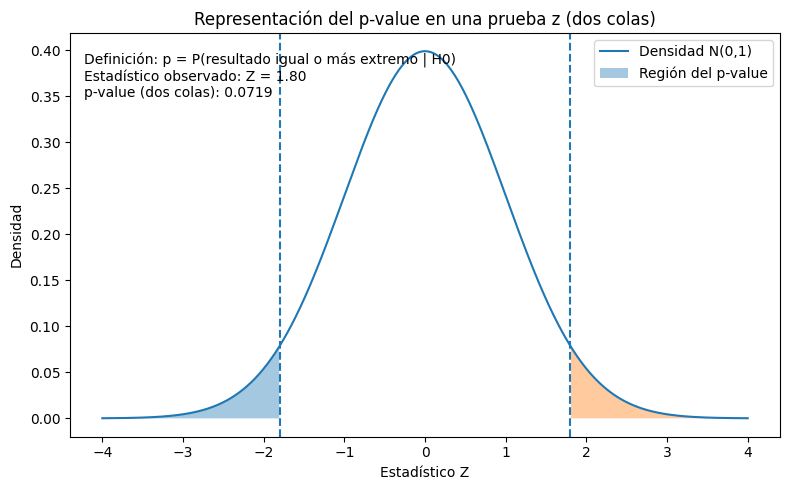

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import erf

# Parámetros
z_obs = 1.8      # estadístico observado (ejemplo)
two_tailed = True

# Funciones auxiliares
def phi(x):
    return (1.0/np.sqrt(2*np.pi)) * np.exp(-0.5*x*x)

def Phi(x):
    return 0.5*(1.0 + erf(x/np.sqrt(2.0)))

# Cálculo del p-value
if two_tailed:
    p_value = 2 * (1 - Phi(abs(z_obs)))
else:
    p_value = 1 - Phi(z_obs)

# Rango y densidad
x = np.linspace(-4, 4, 800)
y = phi(x)

# Figura
fig, ax = plt.subplots(figsize=(8, 5))

# Curva de densidad
ax.plot(x, y, label="Densidad N(0,1)")

# Sombreado de la(s) cola(s)
if two_tailed:
    mask_left = x <= -abs(z_obs)
    mask_right = x >= abs(z_obs)
    ax.fill_between(x, 0, y, where=mask_left, alpha=0.4, label="Región del p-value")
    ax.fill_between(x, 0, y, where=mask_right, alpha=0.4)
    ax.axvline(-abs(z_obs), linestyle="--")
    ax.axvline(abs(z_obs), linestyle="--")
else:
    mask_right = x >= z_obs
    ax.fill_between(x, 0, y, where=mask_right, alpha=0.4, label="Región del p-value")
    ax.axvline(z_obs, linestyle="--")

# Anotaciones
ax.set_title("Representación del p-value en una prueba z (dos colas)")
ax.set_xlabel("Estadístico Z")
ax.set_ylabel("Densidad")

texto = [
    "Definición: p = P(resultado igual o más extremo | H0)",
    f"Estadístico observado: Z = {z_obs:.2f}",
    f"p-value (dos colas): {p_value:.4f}"
]
ax.text(0.02, 0.95, "\n".join(texto), transform=ax.transAxes, va="top")

ax.legend(loc="upper right")
plt.tight_layout()
plt.show()


## Intervalos de confianza

Un **intervalo de confianza (IC)** es un **rango de valores** calculado a partir de una muestra que se utiliza para **estimar un parámetro desconocido** de la población (como la media o la proporción).

Representa la **incertidumbre** asociada a una estimación muestral: no da un único valor, sino un intervalo dentro del cual se espera que esté el verdadero parámetro poblacional.

* Una muestra proporciona una **estimación puntual** (por ejemplo, la media muestral $\bar{X}$).
* Sin embargo, debido al **muestreo aleatorio**, esa estimación **varía** entre muestras.
* El intervalo de confianza incorpora esta variabilidad y nos indica **cuán precisas son nuestras estimaciones**.

### Forma general del intervalo

$ \text{IC} = \hat{\theta} \pm ( \text{valor crítico} ) \times ( \text{error estándar} ) $

donde:

* $\hat{\theta}$ es el estimador muestral (por ejemplo, $\bar{X}$),
* el **valor crítico** proviene de una distribución estadística (normal o t),
  - depende del rango del intervalo que queremos
* el **error estándar** mide la variabilidad de la estimación.
  - $ SE = s / \sqrt{n} $

### Interpretación

* Un **intervalo de confianza del 95%** significa que, si repitiéramos el experimento muchas veces,
  **el 95% de los intervalos construidos contendrían el valor real del parámetro**.
* No significa que haya un 95% de probabilidad de que el parámetro esté dentro del intervalo —
  el parámetro es fijo; la variabilidad está en las muestras.

### Ejemplo

Para una media muestral de $\bar{X} = 10$, error estándar $= 0.5$ y un nivel de confianza del 95%:

$ IC_{95\%} = 10 \pm 1.96 \times 0.5 = [9.02, 10.98] $

Interpretación: con un 95% de confianza, el valor medio poblacional se encuentra entre 9.02 y 10.98.


El intervalo es: (np.float64(8.923867804660368), np.float64(11.250256814011045))
El intervalo es: (np.float64(8.760932735378011), np.float64(11.413191883293402))


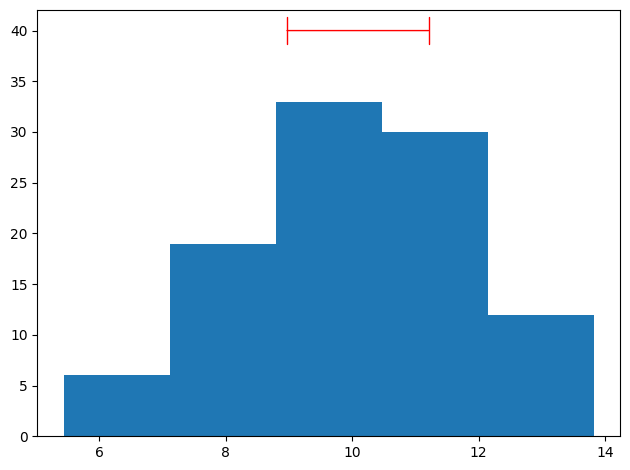

In [50]:
from matplotlib.patches import FancyArrowPatch
import scipy.stats as st

normal_sample = st.norm.rvs(10, 2, 100)

interval = st.t.interval(
    confidence = 0.95,
    df = len(normal_sample) - 1,
    loc = normal_sample.mean(),
    scale = normal_sample.std() / math.sqrt(df)
)
print(f"El intervalo es: {interval}")

interval2 = (
    normal_sample.mean() + st.t.ppf(0.025, 9) * (normal_sample.std()/math.sqrt(9)),
    normal_sample.mean() - st.t.ppf(0.025, 9) * (normal_sample.std()/math.sqrt(9))
)
print(f"El intervalo es: {interval2}")

fig, axes = plt.subplots()
axes.hist(normal_sample, 5)

patch = FancyArrowPatch(
    (interval[0], 40),
    (interval[1], 40),
    arrowstyle = "|-|",
    mutation_scale = 10,
    color = "#FF0000"
)
axes.add_patch(patch)
fig.tight_layout()


### Nivel de confianza


In [52]:
import pandas as pd
samples_1000 = pd.Series(np.zeros(1000)).apply(
    st.norm.rvs,
    size = 10
)

intervals = samples_1000.map(
    lambda x: st.t.interval(
        confidence = 0.95,
        df = 9,
        loc = x.mean(),
        scale = st.sem(x)
    )
).explode().to_numpy().reshape((1000,2))

success_ratio = (
    (intervals.T[0] <= 0) & (intervals.T[1] >= 0)
).sum() / 1000
print(
    f"El {success_ratio*100:0.2f}% de las muestras tienen un "
    "intervalo de confianza que contiene la media poblacional"
)

El 94.80% de las muestras tienen un intervalo de confianza que contiene la media poblacional


**los intervalos de confianza no se limitan a variables numéricas continuas**.

También existen **análogos para variables categóricas**, pero en esos casos lo que se estima **no es una media**, sino una **proporción** .

En una variable categórica, cada categoría puede representarse como una **proporción poblacional** $p$ (por ejemplo, “el 60% de las personas prefiere la opción A”).

A partir de una muestra, se calcula una **proporción muestral** $\hat{p}$ y se estima un **intervalo de confianza** para el valor poblacional de $p$.

Por tanto, el **análogo del intervalo de confianza** para variables categóricas es el **intervalo de confianza para una proporción**.

### Intervalo de confianza para una proporción

Si $\hat{p}$ es la proporción observada en una muestra de tamaño $n$, el intervalo de confianza del $100(1-\alpha)%$ se estima como:

$ IC = \hat{p} \pm z_{1 - \alpha/2} \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} $

donde:

* $\hat{p}$ = proporción muestral
* $n$ = tamaño de muestra
* $z_{1-\alpha/2}$ = valor crítico de la distribución normal (por ejemplo, 1.96 para 95% de confianza)


### Ejemplo

Supongamos que en una encuesta de **100 personas**, **62 respondieron “sí”** a una pregunta.
Entonces:

$ \hat{p} = \frac{62}{100} = 0.62 $

Con un nivel de confianza del 95%:

$ IC_{95\%} = 0.62 \pm 1.96 \sqrt{\frac{0.62(1 - 0.62)}{100}} $
$ IC_{95\%} = 0.62 \pm 0.094 $
$ IC_{95\%} = [0.526,\ 0.714] $

**Interpretación:** con un 95% de confianza, entre el 52.6% y el 71.4% de la población diría “sí”.


## Bootstrap

El **método bootstrap** es una técnica **no paramétrica** de inferencia estadística que permite **estimar la variabilidad** de un estadístico (como la media, mediana o correlación) **a partir de los propios datos muestrales**, sin necesidad de conocer la distribución poblacional.

En lugar de suponer una forma teórica de la población, el bootstrap **simula nuevas muestras** a partir de la muestra observada.

* Aumenta la **robustez** de las conclusiones, ya que no depende de distribuciones teóricas.
* Permite **inferir propiedades poblacionales** cuando los métodos analíticos clásicos no son aplicables o los supuestos (como normalidad) no se cumplen.

### Idea fundamental

1. Se toma una **muestra original** de tamaño $n$.
2. Se generan **muestras bootstrap** del mismo tamaño $n$, **re-muestreando con reemplazo**.
3. Para cada muestra, se calcula el **estadístico de interés** (por ejemplo, la media).
4. La **distribución de los estadísticos obtenidos** sirve para estimar:

   * La **variabilidad (error estándar)**,
   * Los **intervalos de confianza**,
   * La **forma de la distribución del estimador**.

### Ventajas clave

* No requiere conocer la distribución poblacional.
* Aplicable a estadísticos complejos o no lineales.
* Facilita la obtención de **intervalos de confianza empíricos**.


In [ ]:
main_sample = st.norm.rvs(size=100)

replicate = pd.Series(
    [
        np.random.choice(
            main_sample,
            size = 25
        )
        for _ in range(10000)
    ]
)
means = replicate.apply(np.mean)
plt.hist(means, bins = 20)
interval = [
    means.quantile(0.025),
    means.quantile(0.975)
]
print(interval)


## Pruebas de ajuste de una muestra a una distribución.

- Permite medir que tan verosimil es que una muestra haya sido obtenida
  aleatoriamente de una distribución teórica dada.


/tmp/ipykernel_25390/3397814035.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


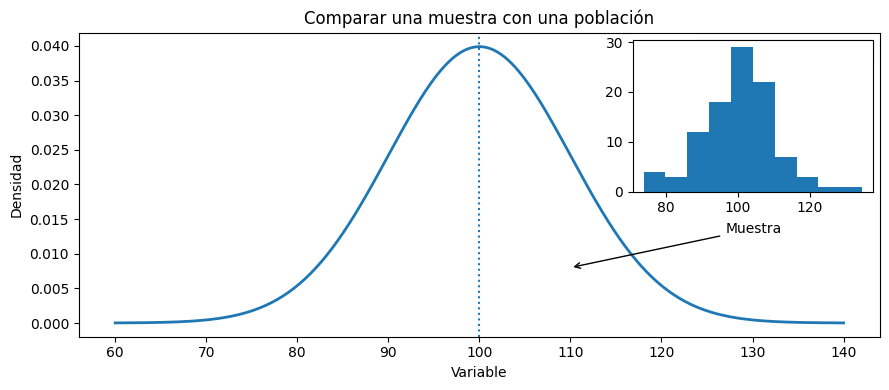

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Configuración general
x = np.linspace(60, 140, 400)

# 1. Comparar una muestra con una población
mu_pop, sigma_pop = 100, 10

y_pop = norm.pdf(x, mu_pop, sigma_pop)
y_samp = norm.rvs(mu_pop, sigma_pop, 100)

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

# --- Gráfico 1: muestra vs población ---
ax.plot(x, y_pop, label='Población (μ=100)', linewidth=2)
ax.axvline(mu_pop, color='C0', linestyle=':')
ax.set_title("Comparar una muestra con una población")
ax.set_xlabel("Variable")
ax.set_ylabel("Densidad")
ax.legend()


inset = inset_axes(ax, width="30%", height="50%", loc="upper right")
inset.hist(y_samp, color='C0', linewidth=2)

ax.annotate(
  text="Muestra",
  xy=(110, 0.008),
  xytext=(127, 0.013),
  arrowprops={"arrowstyle": "->"}
)

plt.tight_layout()
plt.show()


### Test de T de Student para una muestra

- Permite evaluar si
  - la media de una muestra es diferente de una media $\mu_0$.
- El uso del test supone:
  - Distribución normal de la variable (continua) en la población
  - Muestreo al azar (cada observación es independiente)
- El estadístico $t$ sigue una distribución *T de Student* con $n - 1$ grados de libertad.

$ t =  (\bar{x} - \mu ) / { \frac{s}{\sqrt{n}} }$



Supongamos una variable aleatoria $X$ que en la población se distribuye con una
distribución $N(0, 1)$.

- Estamos interesados en apoyar la hipótesis de que la media de esa variable $X$
  en la población es mayor a 0.
  - $H_0 : \mu = 0$
  - $H_1 : \mu > 0$
- el *p value* para un valor observado $T$ será:
  - $P(t \ge T|H_0)$

In [113]:
import scipy.stats as st
import math

normal_sample = st.norm.rvs(size = 10, loc=1.0)
df = len(normal_sample) - 1 # 9

# Calculando a mano
t_value = (normal_sample.mean() - 0) / (normal_sample.std()/math.sqrt(df))
# t_value
pvalue = 1 - st.t.cdf(t_value, df)
print(f"El valor del estadístico T es {t_value}")
print(f"El p-valor es {pvalue}")

El valor del estadístico T es 1.0304461672875402
El p-valor es 0.16484801286951278


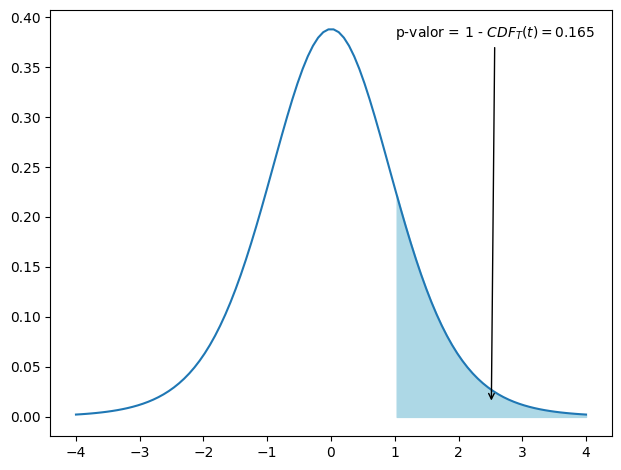

In [114]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 100)

plt.plot(x, st.t.pdf(x, df))

x_fill = np.linspace(t_value, 4, 100)
plt.fill_between(
    x_fill,
    st.t.pdf(x_fill, df),
    color="lightblue"
)

plt.annotate(
    xy = ((4+t_value)/2, st.t.pdf((4+t_value)/2, df)/2),
    xytext = (1, 0.38),
    text = f"p-valor = 1 - $CDF_T(t) = {1-st.t.cdf(t_value, df):0.3f}$",
    arrowprops = {
        "arrowstyle":"->"
    }
)
plt.tight_layout()

In [116]:
# Usando scipy
test_result = st.ttest_1samp(
    normal_sample,
    popmean=0,
    alternative="greater",
)
test_result

TtestResult(statistic=np.float64(1.03044616728754), pvalue=np.float64(0.1648480128695128), df=np.int64(9))

- Podemos definir diferentes hipótesis alternativas:
- Es necesario cambiar la definición del *valor P* para estos casos:
  - $H_1 > 0$ (Una cola, mayor)
    - $p_{value} = 1 - CDF_T(t)$
    - El ejemplo anterior
  - $H_1 < 0$ (Una cola, menor)
    - $p_{value} = CDF_T(t)$
  - $H_a \ne 0$ (dos colas)
    - $p_{value} = 2 \times min(CDF_T(t), 1-CDF_T(t))$


En el caso del test de dos colas:
- Parece evidente:
  - multiplicar por dos al de menor de los p-valores las colas.
- Esto es por la simetría de la distribución.
- En distribuciones asimétricas, no es evidente que hacer:
  - En general se toma la idea de doblar el p-valor menor.

En particular, para una variable aleatoria $X$, que sigue una determinada
distribución si $H_0$ es cierta, dado un estimador $x_0$, el *p value* es:

In [117]:
one_tail_greater = 1 - st.t.cdf(t_value, df)
one_tail_lower = st.t.cdf(t_value, df)

two_tails = 2 * min(one_tail_greater, one_tail_lower)
print(f"El pvalue de una cola, mayor es {one_tail_greater}")
print(f"El pvalue de una cola, menor es {one_tail_lower}")
print(f"El pvalue de dis colas es {two_tails}")

El pvalue de una cola, mayor es 0.16484801286951278
El pvalue de una cola, menor es 0.8351519871304872
El pvalue de dis colas es 0.32969602573902557


In [118]:
one_tail_greater = st.ttest_1samp(normal_sample, popmean = 0, alternative = "greater")
one_tail_lower = st.ttest_1samp(normal_sample, popmean = 0, alternative = "less")
two_tails = st.ttest_1samp(normal_sample, popmean = 0, alternative = "two-sided")
print(f"El pvalue de una cola, mayor es {one_tail_greater.pvalue}")
print(f"El pvalue de una cola, menor es {one_tail_lower.pvalue}")
print(f"El pvalue de dis colas es {two_tails.pvalue}")

El pvalue de una cola, mayor es 0.1648480128695128
El pvalue de una cola, menor es 0.8351519871304872
El pvalue de dis colas es 0.3296960257390256


Text(0.5, 1.0, 'Dos colas')

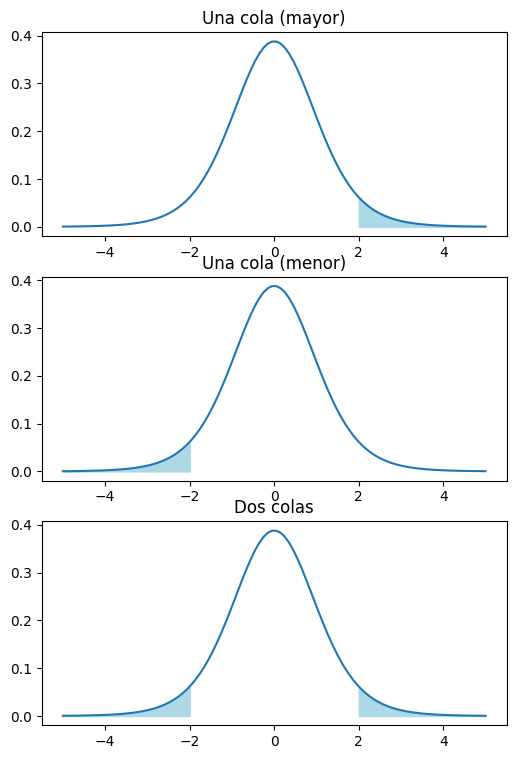

In [120]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
x1 = np.linspace(2, 5, 100)
x2 = np.linspace(-5, 2, 100)
x3 = np.linspace(-5, -2, 100)

fig, axes = plt.subplots(figsize = (6, 9), nrows = 3)

axes[0].plot(x, st.t.pdf(x, 9))
axes[0].fill_between(x1, st.t.pdf(x1, 9), color="lightblue")
axes[0].set_title("Una cola (mayor)")

axes[1].plot(x, st.t.pdf(x, 9))
axes[1].fill_between(x3, st.t.pdf(x3, 9), color="lightblue")
axes[1].set_title("Una cola (menor)")

axes[2].plot(x, st.t.pdf(x, 9))
axes[2].fill_between(x3, st.t.pdf(x3, 9), color="lightblue")
axes[2].fill_between(x1, st.t.pdf(x1, 9), color="lightblue")
axes[2].set_title("Dos colas")


### Prueba χ²

Se puede utilizar para testear la bondad de ajuste de:
- cualquier distribución univariada
  - para la cual se pueda calcular la *CDF*.
- Requiere datos en grupos
  - Para poder utilizar el test en una distribución continua
    debemos discretizar los datos (como en un histograma)
- Es sensible a la elección de los bins.
- El tamaño muestral debe ser relativamente grande.
- $ χ^{2} = \sum_{i=1}^{k}{\frac{(O_i - E_i)^{2}}{E_i}} $
- Es necesario indicar los grados de libertad.
  - número de categorías que pueden variar libremente en un análisis.

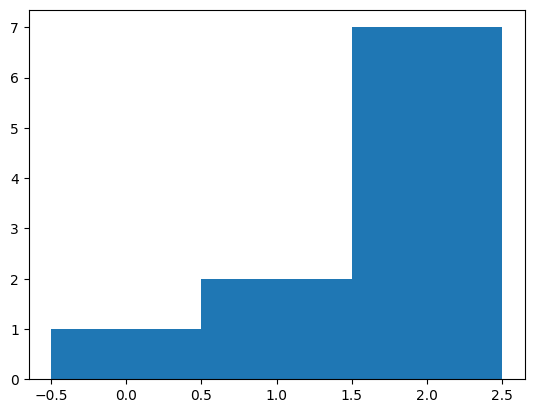

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

observed = st.binom.rvs(n=10, p=0.2, size = 100)

values = np.unique(observed)
values.sort()
mval = max(values)

_ = plt.hist(
  observed,
  bins = range(mval+1),
  width = 1,
  align = "left"
)


In [31]:
obs_cdf = st.cumfreq(
  observed,
  numbins=mval+1,
  defaultreallimits = (0, mval)
).cumcount

teoretical_cdf = st.binom.cdf(
  np.arange(mval+1),
  n=10,
  p=0.2
)

teoretical_cdf = teoretical_cdf * sum(obs_cdf) / sum (teoretical_cdf)

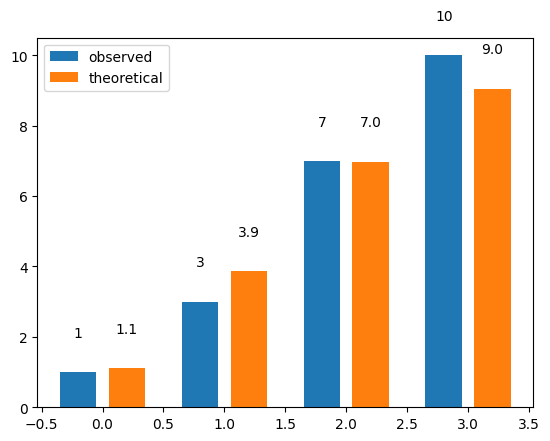

In [32]:
fig, axes = plt.subplots()

axes.bar(np.arange(mval+1)-0.2, obs_cdf, width = 0.3, label = "observed")
axes.bar(np.arange(mval+1)+0.2, teoretical_cdf, width = 0.3, label = "theoretical")

for x, y in zip(np.arange(mval+1)-0.2, obs_cdf):
  axes.text(x, y+1, f"{y:0.0f}", ha="center")
for x, y in zip(np.arange(mval+1)+0.2, teoretical_cdf):
  axes.text(x, y+1, f"{y:0.1f}", ha="center")

_ = axes.legend()

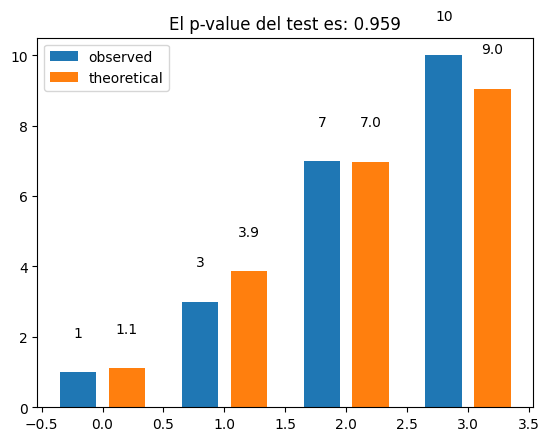

In [33]:
resultado = st.chisquare(
  f_obs=obs_cdf,
  f_exp=teoretical_cdf
)

axes.set_title(f"El p-value del test es: {resultado.pvalue:0.3f}")
fig

### Prueba de Kolmogórov-Smirnov

- Usa la función de densidad acumulada (*CDF*).
- Hipótesis Nula y Alternativa:
  - Hipótesis Nula (H0): La muestra sigue la distribución teórica propuesta.
  - Hipótesis Alternativa (H1): La muestra no sigue la distribución teórica propuesta.
- Su estadístico, $D$:
  - mide la distancia entre:
    - la *CDF* de la distribución de la hipótesis nula,
    - y la *CDF* de la muestra.
  - Es el valor máximo de las diferencias.
  - $D=0$ si ambas distribuciones acumuladas son idénticas.
- La distribución nula debe ser **continua**.
- No tiene gran poder
  - puede requerir un tamaño muestral grande para rechazar la hipótesis nula.

In [121]:
import scipy.stats as st

sample_size = 100
sample_one = st.norm.rvs(size=sample_size)

In [122]:
sample_one_ecdf_x = sample_one.copy()
sample_one_ecdf_x.sort()
sample_one_ecdf_y = np.arange(sample_size)/sample_size

In [123]:
normal_cdf_y = st.norm.cdf(sample_one_ecdf_x)

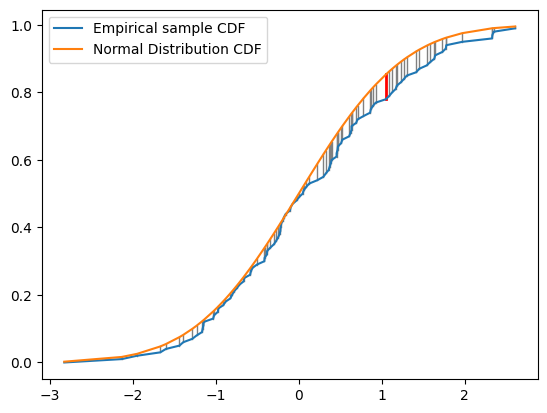

In [124]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()

max_diff_index = np.argmax(np.abs(sample_one_ecdf_y - normal_cdf_y))

for i, (x, y1, y2) in enumerate(zip(sample_one_ecdf_x, sample_one_ecdf_y, normal_cdf_y)):
  color = "gray" if i != max_diff_index else "red"
  lwd = 1  if i != max_diff_index else 2
  axes.plot([x, x], [y1, y2], color=color, linewidth = lwd)

axes.plot(
  sample_one_ecdf_x,
  sample_one_ecdf_y,
  label = "Empirical sample CDF"
)
axes.plot(
  sample_one_ecdf_x,
  normal_cdf_y,
  label = "Normal Distribution CDF"
  )

_ = axes.legend()

In [125]:
st.kstest(sample_one, st.norm.cdf)

KstestResult(statistic=np.float64(0.07345961468079021), pvalue=np.float64(0.6262557874079298), statistic_location=np.float64(1.0513872469777175), statistic_sign=np.int8(-1))

## Comparación de dos muestras


### Tests de forma

#### Test de Kolmogorov-Smirnov

- Una variante del test del mismo nombre ya visto.
  - Permite comparar dos muestras
  - La hipótesis nula es que ambas provienen de la misma población.

In [ ]:
import scipy.stats as st

sample_one = st.norm.rvs(size=250)
sample_two = st.norm.rvs(size=250)
sample_three = st.t.rvs(1, size=250)

same_dist_res = st.kstest(sample_one, sample_two)
print(f"El pvalue para dos muestras de la misma población es:", same_dist_res)
diff_dist_res = st.kstest(sample_one, sample_three)
print(
    f"El pvalue para dos muestras de diferentes poblaciones es:",
    diff_dist_res
)


#### Test de $\chi2$ para dos muestras

- Requiere agrupar los datos en *bins*
- Es sensible a:
  - valores extremos.
  - Cantidad de *bins*


In [ ]:
# Genero las muestras
sample_one = st.norm.rvs(size=100)
sample_two = st.norm.rvs(size=100)
# Agrupo los datos en categorias
maxval = np.concatenate((sample_one, sample_two)).max()
minval = np.concatenate((sample_one, sample_two)).min()
s1hist = np.histogram(sample_one, bins=5, range=(minval, maxval))
s2hist = np.histogram(sample_two, bins=5, range=(minval, maxval))
print(
    f"El primer grupo es: {s1hist[0]}\n",
    f"El segundo grupo es: {s2hist[0]}"
)

In [ ]:
# Calculo las frecuencias esperadas:
fexp = (s1hist[0] + s2hist[0])/2
fexp = np.array([fexp, fexp])

# Genero un array 2D con los datos observados
fobs = np.array([s1hist[0], s2hist[0]])

print(f"Las frecuencias esperadas son:\n{fexp}\n")
print(f"Los datos observados son:\n{fobs}\n")
dof = len(fobs[0])-1
print(f"Los grados de libertad son: {dof}")


In [ ]:
st.chisquare(
    f_obs = fobs.ravel(),
    f_exp = fexp.ravel(),
    ddof = fobs.size - 1 - dof
)

# DOFcomputed = size - 1 - ddof = size - 1 - (size - 1 - dof) =>
# DOFcomputed = dof

Otra opción es usar tablas de contigencia

In [ ]:
chi2, p, dof, ex = st.chi2_contingency(fobs)
print(chi2, p, dof, ex)

Usando tablas de contingencia podemos comparar distribuciones de variables
categóricas.


In [ ]:
import pandas as pd
from time import time_ns, sleep
marcas = ["MarcaA", "MarcaB", "MarcaC", "MarcaD", "MarcaE"]

grupos = [
    "Niños",
    "Jovenes",
    "Adultos"
]

sample_size = 50
data = []
for g in grupos:
    # np.random.seed(3)
    freqs = np.random.uniform(size=len(marcas))
    freqs = freqs/freqs.sum()
    sample_summary = st.multinomial.rvs(
        sample_size,
        freqs,
        1,
        random_state = time_ns() % 323
    ).squeeze()
    data.append(sample_summary)
data = np.array(data)
data.T
data = pd.DataFrame(
    data = data,
    index = grupos,
    columns = marcas
)
data

In [ ]:
chi2, pval, dof, ex = st.contingency.chi2_contingency(data)
print(f"El pvalue es {pval}")

### Tests de igualdad de varianza

In [ ]:
import sklearn.datasets as datasets

iris = datasets.load_iris(as_frame=True)

iris["frame"].groupby("target").var()

#### F test de igualdad de varianzas

- Asume que las dos distribuciones son normales
- La hipótesis nula es que las varianzas son iguales.
- Se calcula un estadístico F.
- Luego se calcula un p-value de acuerdo a la distribución F teórica.

In [ ]:
g1 = iris["frame"].loc[iris["frame"]["target"]==0, "sepal width (cm)"]
g2 = iris["frame"].loc[iris["frame"]["target"]==1, "sepal width (cm)"]

fig, axes = plt.subplots()
for i, d in enumerate((g1, g2)):
  x = np.linspace(-0.3, 0.3, len(d))
  axes.scatter(x+i, d-d.mean(), label = f"G{i+1}")
axes.set_ylim(-2, 2)
axes.legend(loc="lower left")
axes.set_ylabel("data - mean(data)")
axes.set_xlabel("Grupos")
axes.set_xticks([])
plt.legend()
fig.tight_layout()


Comprobemos que las distribuciones "son" normales.

In [ ]:
r1 = st.shapiro(g1)
r2 = st.shapiro(g2)
for x in (r1, r2):
  print(x.pvalue)

Calculamos el estadístico F y el pvalue.

In [ ]:
import matplotlib.pyplot as plt

f_statistic = g2.var() / g1.var()
pvalue = 1 - st.f.cdf(
  f_statistic,
  g1.size-1,
  g2.size-1
)

pvalue2 = st.f.cdf(
  f_statistic,
  g1.size-1,
  g2.size-1
)

x = np.linspace(0, 2.5, 100)
xf = np.linspace(0, f_statistic, 100)

plt.plot(x, st.f.pdf(x, g1.size-1, g2.size-1))
plt.fill_between(xf, st.f.pdf(xf, g1.size-1, g2.size-1), color="lightblue")
plt.annotate(
  xy = (1.6, 0.15),
  xytext = (1.35, 0.75),
  text = f"$P_{{val}}$ = $1-CDF_F(f)$ = {pvalue:0.3f}",
  arrowprops = {"arrowstyle": "->"},
  fontsize = 14
)
plt.scatter([f_statistic], [0], color = "green")
plt.annotate(
  xy = (f_statistic, 0),
  xytext = (0.6, 0.35),
  text = f"F = $\\frac{{S_{{g1}}^2}}{{S_{{g2}}^2}}$ = {f_statistic:0.2f}",
  arrowprops = {"arrowstyle": "->"},
  fontsize = 14
)
plt.tight_layout()

print(f"F es: {f_statistic}")
print(f"El pvalue es: {pvalue}")


#### Test de igualdad de varianzas de Bartlett

- Asume que las distribuciones son normales.
- Es sensible a alejamientos de la normalidad.
- Se puede utilizar con varias muestras simultáneamente.


In [ ]:
a = st.bartlett(g1, g2)
b = 1 - st.chi2.cdf(a.statistic, 1)
print(a, b)


In [ ]:
import matplotlib.pyplot as plt

A = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
B = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
C = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]
D = [59, 68, 99, 93, 72, 65, 73, 82, 72, 89]

a = st.bartlett(A, B, C, D)
b = 1 - st.chi2.cdf(a.statistic, 3)
fig, axes = plt.subplots()
for i, d in enumerate((A, B, C ,D)):
    x = np.linspace(-0.3, 0.3, len(d))
    axes.scatter(x+i, d, label = f"G{i}")
axes.set_ylim(20, 110)
axes.legend(loc="lower left")
axes.text(
    x = 1.5,
    y = 30,
    s = (
        f"Bartlett Statistic ($B_S$) = {a.statistic:0.3f}\n"
        f"Bartlett P-Value = {a.pvalue:0.5f}\n"
        f"$1 - CDF_T(B_S)$ = {b:0.5f}"
    )
)
fig.tight_layout()

#### Test de igualdad de varianzas de Levene

- Es más robusto ante distribuciones no normales.
- Se calcula un estadístico W
  - $A = {\sum_{i=1}^{N}N_i(\bar{Z}_{i.}-\bar{Z}_{..})^2}$
  - $B = {\sum_{i=1}^k\sum_{j=1}^{N_i}(Z_{ij}-\bar{Z}_{i.})^2}$
  - $Z = |Y_{ij} - \bar{Y}_{i.}|$
  - $W = \frac{N-k}{k-1}\frac{A}{B}$
- Luego se calcula el p-value sobre la función $F_{k-1,N-k}$

In [ ]:
levene_result = st.levene(g1, g2)
levene_stat = levene_result.statistic
levene_pval = levene_result.pvalue
print(1 - st.f.cdf(levene_stat, 1, 98))
print(levene_pval)

### Test de igualdad de medias

### Test de Student para dos muestras

- Asume que las varianzas son iguales
  - existe una alternativa a este test:
    - test de Welch
    - no requiere asumir esta condición

In [ ]:
sample_one = st.lognorm.rvs(
    s=1,
    size = 30
)
sample_two = st.norm.rvs(
    scale = st.lognorm.std(s=1),
    size = 30,
    loc = st.lognorm.mean(s=1)
)
plt.hist(
    [
        sample_one,
        sample_two
    ],
    bins = 10
)
plt.xlim(-3, 7)

m1 = sample_one.mean()
m2 = sample_two.mean()
plt.plot([m1, m1],[0, 5], color = "red")
plt.annotate(
    xy = [m1, 5],
    xytext = [0.95, 0.95],
    ha = "right",
    text = "Mean LogNormal",
    textcoords = "axes fraction",
    arrowprops = {"arrowstyle":"->"}
)
plt.plot([m2, m2],[0, 5], color = "green")
plt.annotate(
    xy = [m2, 5],
    xytext = [0.95, 0.85],
    textcoords = "axes fraction",
    ha = "right",
    text = "Mean Normal",
    arrowprops = {"arrowstyle":"->"}
)

st.ttest_ind(sample_one, sample_two)

#### Test de Student para muestras apareadas

- Las mediciones de ambas muestras
  - corresponden a los mismos individuos
  - en dos condiciones diferentes.
  - Por ejemplo, antes y después de un tratamiento.

In [ ]:
sample_one = st.uniform.rvs(size=20)
effect = st.uniform.rvs(scale=0.01, size = 20)
sample_two = sample_one + effect
sample_three = st.uniform.rvs(size=20, loc=0.15)

with_effect = st.ttest_rel(sample_one, sample_two)
without_effect = st.ttest_rel(sample_one, sample_three)
print(f"El pvalue con efecto es {with_effect.pvalue}")
print(f"El pvalue sin efecto es {without_effect.pvalue}")

### Alternativas no paramétricas

#### Mann Whitney U Test

- Es un test no paramétrico.
- Asume que:
  - Las observaciones son independientes en ambos grupos.
- La hipótesis nula asume que las distribuciones de las dos poblaciones son
  iguales.
- Es semejante a un test de medias:
  - Dados x, y
    - Tomados de las muestras X e Y
  - La probabilidad de x > y es la misma que la de y > x


In [ ]:
sample_one = st.binom.rvs(n=10, p=0.3, size=20)
sample_two = st.binom.rvs(n=10, p=0.45, size=80)

st.mannwhitneyu(sample_one, sample_two)


#### Wilcoxon signed rank text

- Test para muestras pareadas
- La hipótesis nula es que no hay un efecto:
  - Se comprueba analizando el signo de las diferencias de ambas muestras.
  - Se verifica si tiene una distribución binomial con p=0.5

In [ ]:
sample_one = st.expon.rvs(size= 25)
effect = st.uniform.rvs(size=25, scale=0.01)
errors = st.norm.rvs(size=25, scale=0.01)
sample_two = sample_one + effect + errors

st.wilcoxon(sample_one, sample_two)

Ejercicio: Calcular el pvalue usando la CDF de la distribución binomial.


### Test de la mediana

- Es un caso especial de la prueba de **chi-cuadrado**.
- Se genera una tabla de contingencia:
    - Se calcula la mediana para todos los datos ($x$ e $y$)
    - Se arman grupos:
      - por encima o por debajo de la mediana.
      - las variables $x$ y $y$.
- Esta prueba posee poco poder.

In [ ]:
sample_one = st.uniform.rvs(size = 25)
sample_two = st.uniform.rvs(size = 45, loc=0.5)
global_median = np.median(np.concatenate([sample_one, sample_two]))
global_median
data = [
    [
        (sample_one<=global_median).sum(),
        (sample_one>global_median).sum()
    ],
    [
        (sample_two<=global_median).sum(),
        (sample_two>global_median).sum()
    ],
]
data = np.array(data)
data
stat, pval, df, ex = st.contingency.chi2_contingency(data)
print(f"El p-value es {pval}")

#### Test de Fischer

- Se usa para determinar si existe
  - una asoociación significante entre dos variables nominales.
- Es una variante al test $\chi^2$ cuando hay pocas cuentas.
- Se comparan:
  - dos grupos
  - dos variables
  - Tabla de contingencia $2\times2$



In [ ]:
import pandas as pd
data = [
    ["old", "female", "advanced"], ["young", "female", "advanced"],
    ["old", "male", "advanced"], ["old", "female", "stable"],
    ["young", "male", "advanced"], ["old", "female", "advanced"],
    ["old", "female", "advanced"], ["young", "male", "advanced"],
    ["young", "male", "stable"], ["old", "male", "stable"],
    ["young", "male", "stable"], ["young", "male", "stable"],
    ["old", "male", "stable"], ["old", "male", "stable"],
    ["old", "female", "advanced"], ["young", "male", "stable"],
    ["old", "female", "stable"], ["old", "male", "advanced"],
    ["young", "female", "advanced"], ["old", "female", "advanced"],
    ["old", "male", "stable"], ["old", "male", "stable"],
    ["young", "male", "stable"], ["old", "male", "advanced"],
    ["old", "female", "advanced"]
]
df = pd.DataFrame(
    data,
    columns = ["age", "sex", "disease"]
)
df

In [ ]:
import scipy.stats as st

elements, counts = st.contingency.crosstab(df["sex"], df["disease"])
df_counts = pd.DataFrame(counts)
df_counts.index = elements[0]
df_counts.columns = elements[1]
print(df_counts)

odds_ratio, pvalue = st.fisher_exact(counts)
print(odds_ratio, pvalue)

# ¿Qué pasa con el sexo?

### McNemar test

- Se usa para buscar diferencias en tablas de contingencia (2x2)
  - cuando se tienen muestra aparedas.
- El uso típico es buscar cambios es individuos
  - Antes vs. después de un tratamiento
  - El tipo de variable que se mide es la misma

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

data =[
    ['stage_2', 'stage_1'], ['stage_1', 'stage_2'],
    ['stage_2', 'stage_1'], ['stage_1', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_2', 'stage_1'],
    ['stage_2', 'stage_1'], ['stage_1', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_1', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_1', 'stage_2'],
    ['stage_2', 'stage_1'], ['stage_2', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_2', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_2', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_1', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_2', 'stage_1'],
    ['stage_1', 'stage_1'], ['stage_2', 'stage_2'],
    ['stage_1', 'stage_1']
]
df = pd.DataFrame(
    data,
    columns = ["before", "after_1y"]
)
df

elements, counts = st.contingency.crosstab(df["before"], df["after_1y"])

df_counts = pd.DataFrame(counts)
df_counts.index = [("before", x) for x in elements[0]]
df_counts.columns = [("after", x) for x in elements[1]]
print(df_counts)

result = mcnemar(counts)

result.pvalue

# Y si las variables tienen más de dos valoresposibles.


#### Test de Mantel-Haenszel

- Es una prueba estadística utilizada para evaluar si existe una asociación
  entre dos variables categóricas,
- Controlando o estratificando por una tercera variable categórica.
- Es particularmente útil cuando se desea examinar la asociación entre dos
  variables categóricas en presencia de un posible efecto de confusión de una
  tercera variable.

Tenemos datos de:

- un tratamiento de una droga contra un cierta enfermedad
- en niños y en adultos
- A la mitad de las personas se le administra la droga
- a la otra mitad se le administra un placebo
- El tratamiento dura seis meses
  - luego se observa si hay una respuesta positiva o negativa en los síntomas.

In [67]:
import pandas as pd
import scipy.stats as st
! wget https://github.com/javieriserte/qualitative-data-course/raw/master/classes/cmh.data.csv
df = pd.read_csv(
  "cmh.data.csv",
  header = [0],
  sep = ","
)
df

--2025-11-08 07:56:54--  https://github.com/javieriserte/qualitative-data-course/raw/master/classes/cmh.data.csv
Resolviendo github.com (github.com)... 4.228.31.150
Conectando con github.com (github.com)[4.228.31.150]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: https://raw.githubusercontent.com/javieriserte/qualitative-data-course/master/classes/cmh.data.csv [siguiente]
--2025-11-08 07:56:54--  https://raw.githubusercontent.com/javieriserte/qualitative-data-course/master/classes/cmh.data.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[2606:50c0:8000::154]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 3098 (3,0K) [text/plain]
Guardando como: ‘cmh.data.csv.1’

cmh.data.csv.1      100%[===================>]   3,03K  --.-KB/s    en 0s      

2025-11-08 07:5

,tratamiento,respuesta,edad
0,placebo,positiva,menor
1,placebo,positiva,menor
2,placebo,positiva,menor
3,placebo,positiva,menor
4,placebo,positiva,menor
...,...,...,...
139,med,negativa,adulto
140,med,negativa,adulto
141,med,negativa,adulto
142,med,negativa,adulto


Veamos con un test $\chi^2$ si hay un efecto o no...

In [73]:
table = pd.crosstab(df["tratamiento"], df["respuesta"])
print("Tabla de contingencia:\n")
print(table)
stat, pvalue, dof, expected = st.contingency.chi2_contingency(table)
print("\np-value:")
print(pvalue)

Tabla de contingencia:

respuesta    negativa  positiva
tratamiento                    
med                28        44
placebo            16        56

p-value:
0.046593703371131986


Veamos como son las tablas de contingencia estratificando por edad.

In [69]:
table = pd.crosstab(df["respuesta"], [df["edad"], df["tratamiento"]])
table

edad        adulto         menor        
tratamiento    med placebo   med placebo
respuesta                               
negativa        24       8     4       8
positiva        12       4    32      52

¿Hay algún efecto en cada estrato?

In [70]:
statistic, pvalue, dof, expected = st.contingency.chi2_contingency(table[("adulto", )])
print(f"p-value:{pvalue}")

p-value:1.0


In [71]:
statistic, pvalue, dof, expected = st.contingency.chi2_contingency(table[("menor", )])
print(f"p-value:{pvalue}")

p-value:1.0


Test de Mantel-Haenszel

In [72]:
import statsmodels.api as sm
cmh_result = sm.stats.StratifiedTable(
  [
    table[("menor",)],
    table[("adulto", )]
  ]
).test_null_odds()
print(cmh_result)

pvalue      0.8142582723910017
statistic   0.05519500587180914
